# *Лабораторна робота №4.*
# *По темі : Пакет Tensorflow*
***


## **Виконав:** 
* ## Студент 4 курсу
* ## Группи АнД-41
* ## Сірий Артем Олександрович
* ## Варінат №11

***

## *Завдання :*
## 1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101.
## 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи. 
## Класи : i1=11-1=10 , i2=11+29=40 , i3=11+59=70
## 3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
## 4. Результати викласти у репозиторії GitHub (папка Lab4).
## 5. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

***

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import pathlib
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Імпортуємо класи

In [2]:
data_folder_bruschetta = pathlib.Path("train/")
class_names = np.array(sorted([item.name for item in data_folder_bruschetta.glob('*')]))
print(class_names)

['bruschetta' 'grilled_salmon' 'pad_thai']


In [3]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class,color='white')
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

## Виведемо 10 рандомних фото

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (288, 512, 3)
Image shape: (382, 512, 3)
Image shape: (382, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


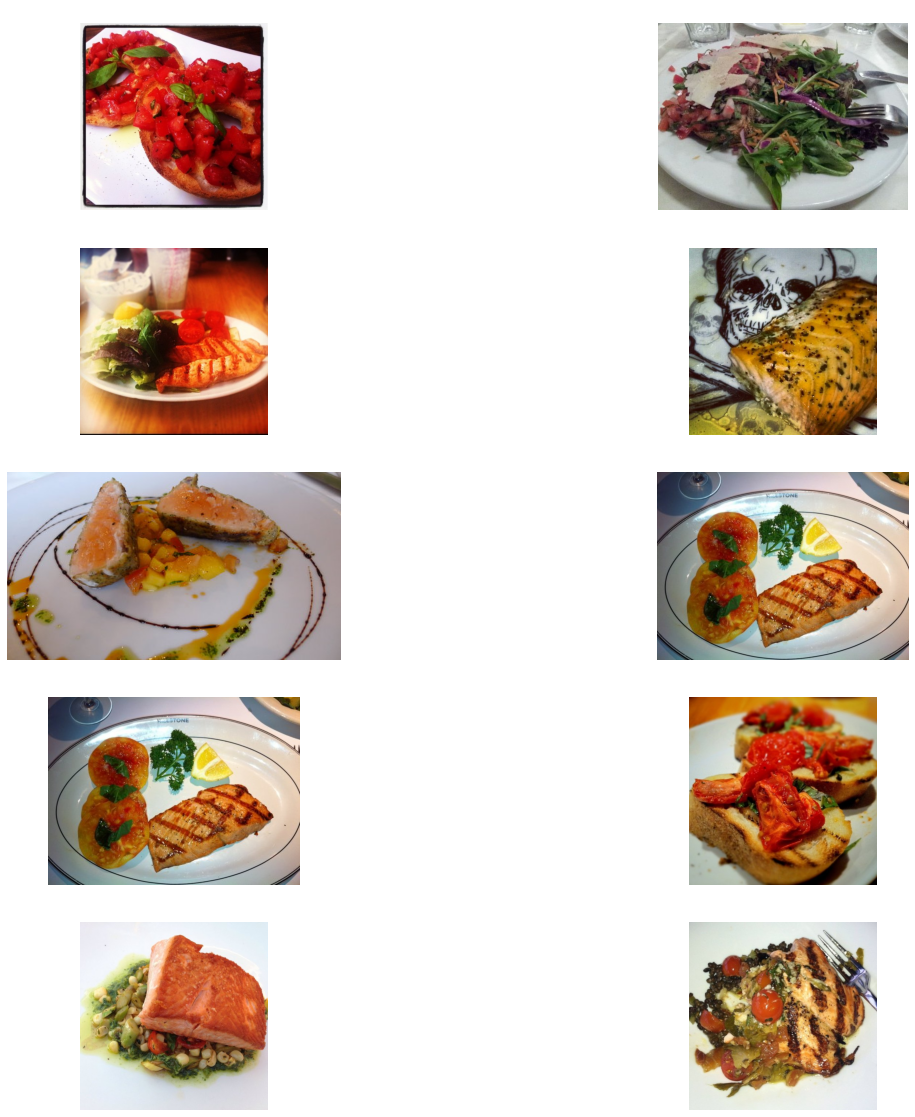

In [4]:
foo = ["bruschetta", "grilled_salmon", "pad_thai"] 
secure_random = random.SystemRandom()
plt.figure(figsize=(20,20))
for p in range(10):
    foo_choice = secure_random.choice(foo)
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(view_random_image(target_dir="train/", target_class=foo_choice))
    

## Будуємо модель

In [5]:
tf.random.set_seed(11)

# Зведення до бінарного виду (чорно-білого)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "train/"
test_dir = "test/"

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='categorical',
                                               seed=11)

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=11)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [6]:
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [7]:
labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## По 250 даних на тренування та по 75 на валідацію для кожного класу 
## Напишимо функцію для подальшої побудови графіків


In [8]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

## Створимо нашу першу модель. На виході 3 класи

In [9]:
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
        kernel_size=3,
        activation="relu", 
        input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2,
            padding="valid"), 
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation="sigmoid")
])

In [10]:
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [11]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data
                        )

Epoch 1/5
24/24 [==============================] - 15s 597ms/step - loss: 0.6459 - accuracy: 0.3373 - val_loss: 0.6436 - val_accuracy: 0.3244
Epoch 2/5
24/24 [==============================] - 14s 598ms/step - loss: 0.6292 - accuracy: 0.4107 - val_loss: 0.6248 - val_accuracy: 0.4178
Epoch 3/5
24/24 [==============================] - 14s 598ms/step - loss: 0.5785 - accuracy: 0.5360 - val_loss: 0.6269 - val_accuracy: 0.4578
Epoch 4/5
24/24 [==============================] - 15s 603ms/step - loss: 0.5190 - accuracy: 0.6173 - val_loss: 0.6163 - val_accuracy: 0.5111
Epoch 5/5
24/24 [==============================] - 15s 605ms/step - loss: 0.4424 - accuracy: 0.6973 - val_loss: 0.6379 - val_accuracy: 0.4844


## Точність на тренувальній 0.69, а на валідаційній 0.48, що для трьох класів досить непогано, прото не найкраще.

<AxesSubplot:>

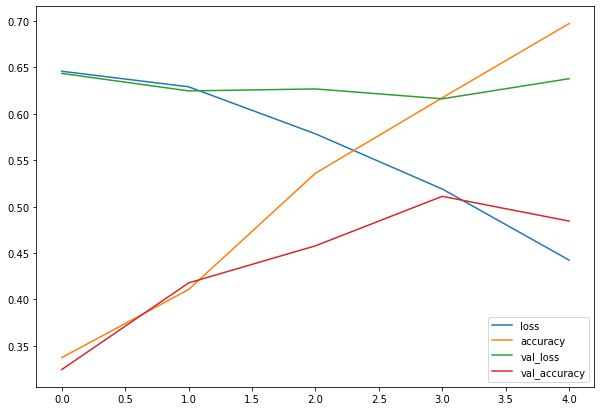

In [12]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

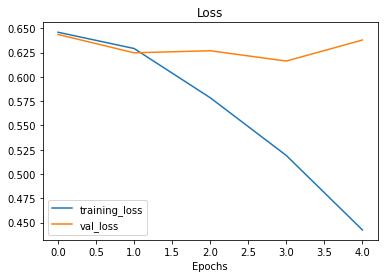

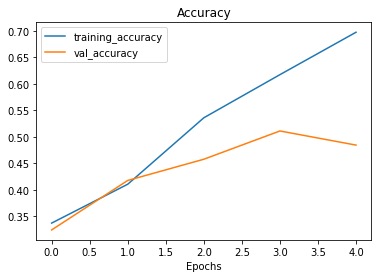

In [13]:
plot_loss_curves(history_1)

## Після багатьох спроб покращення прийдемо до кращого варіанту розвитку

In [14]:
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_9 = model_9.fit(train_data,
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/6
24/24 [==============================] - 14s 582ms/step - loss: 0.4967 - accuracy: 0.8427 - val_loss: 1.0900 - val_accuracy: 0.5200
Epoch 2/6
24/24 [==============================] - 14s 601ms/step - loss: 0.3501 - accuracy: 0.8973 - val_loss: 1.6345 - val_accuracy: 0.4178
Epoch 3/6
24/24 [==============================] - 14s 589ms/step - loss: 0.2962 - accuracy: 0.9067 - val_loss: 1.5403 - val_accuracy: 0.4667
Epoch 4/6
24/24 [==============================] - 14s 598ms/step - loss: 0.1802 - accuracy: 0.9547 - val_loss: 1.4637 - val_accuracy: 0.4533
Epoch 5/6
24/24 [==============================] - 14s 602ms/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 1.8901 - val_accuracy: 0.4444
Epoch 6/6
24/24 [==============================] - 15s 604ms/step - loss: 0.0413 - accuracy: 0.9933 - val_loss: 2.0613 - val_accuracy: 0.4622


## Маємо очевидне перетренерування моделі, та помірну точність на виході.

<AxesSubplot:>

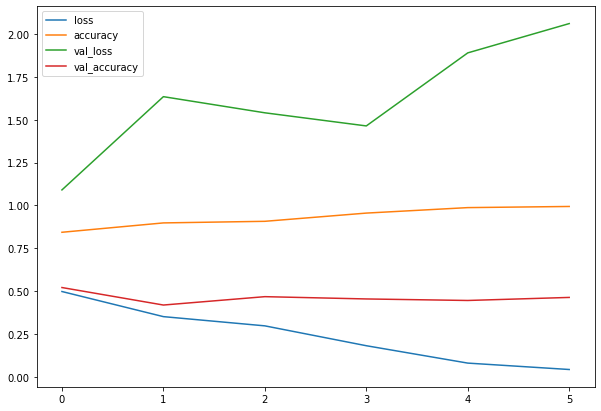

In [23]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7))

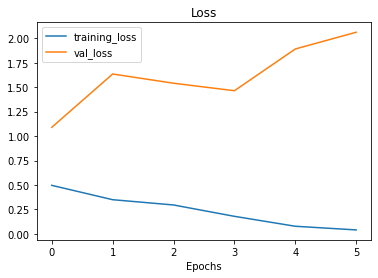

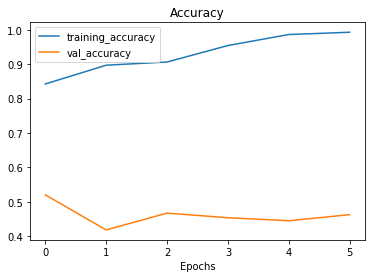

In [24]:
plot_loss_curves(history_9)

## Перевіримо правильність передбачення класу моделі по оригінальному фото

In [18]:
def load_and_prep_image(filename, img_shape=224):
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

# Повинна бути брускета, а видало рибу. Проте до риби мережа відносить більшість фото з явними полосками від грилю, можливо діло в цьому

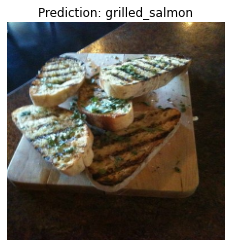

In [25]:
pred_and_plot(model_9, "train/bruschetta/75527.jpg", class_names)

# Риба в оригіналі - брускета в передбаченні.

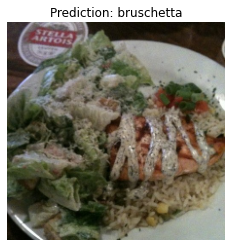

In [29]:
pred_and_plot(model_9, "train/grilled_salmon/456696.jpg", class_names)

# А тут пасту чомусь віднесло до брускети

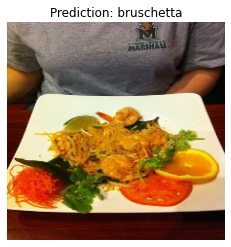

In [27]:
pred_and_plot(model_9, "train/pad_thai/136545.jpg", class_names)

***
# *Висновок*
***
## *В ході виконання лаборатоної роботи було використано бібліотеку з набором фотографій їжі. До варіанту відносились брускети, риба та паста.*
## *Загальна кількість вибірки 975 екземплярів. З них 750 на тестову вибірку та 225 на валідаційну. Класи розподілені рівномірно за кількістю.*
## *Провевши моделювання та n-у кількість тестів, було виявленно що використовувавши learning_rate з будь яким параметром наша модель завжди сходилась до точності 0.33 на вході та виході.*